<a href="https://colab.research.google.com/github/hadil1999-creator/Summer-Internship-at-Innov-com/blob/main/INNOV'COM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Emotional Recongnition:
3 steps:a) face detection, b) facial expression detection, c) expression classification to an emotional state

In [ ]:
import numpy as np
import tensorflow as tf
import os
import PIL
import PIL.Image

Downloading the dataset

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d stoicstatic/face-recognition-dataset

 84% 153M/181M [00:05<00:01, 24.7MB/s]
100% 181M/181M [00:05<00:00, 35.6MB/s]


In [ ]:
!unzip face-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Data/Face Dataset/1618/0.jpg  
  inflating: Face Data/Face Dataset/1618/1.jpg  
  inflating: Face Data/Face Dataset/1618/2.jpg  
  inflating: Face Data/Face Dataset/1619/0.jpg  
  inflating: Face Data/Face Dataset/1619/1.jpg  
  inflating: Face Data/Face Dataset/1619/2.jpg  
  inflating: Face Data/Face Dataset/1619/3.jpg  
  inflating: Face Data/Face Dataset/1619/4.jpg  
  inflating: Face Data/Face Dataset/162/0.jpg  
  inflating: Face Data/Face Dataset/162/1.jpg  
  inflating: Face Data/Face Dataset/162/2.jpg  
  inflating: Face Data/Face Dataset/1620/0.jpg  
  inflating: Face Data/Face Dataset/1620/1.jpg  
  inflating: Face Data/Face Dataset/1621/0.jpg  
  inflating: Face Data/Face Dataset/1621/1.jpg  
  inflating: Face Data/Face Dataset/1621/2.jpg  
  inflating: Face Data/Face Dataset/1621/3.jpg  
  inflating: Face Data/Face Dataset/1621/4.jpg  
  inflating: Face Data/Face Dataset/1621/5.jpg  
  inflating: Face Dat

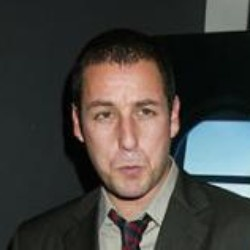

In [ ]:
from IPython.display import Image 
pil_img = Image(filename='/content/Face Data/Face Dataset/10/0.jpg')
display(pil_img)

Face Detection

In [ ]:
import cv2
import sys

In [ ]:
cv2.__version__

'4.1.2'

In [ ]:
imagePath = sys.argv[1]
cascPath = "haarcascade_frontalface_default.xml"

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascPath)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


In [ ]:
image = cv2.imread('/content/Face Data/Face Dataset/10/0.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.1, 2)

In [ ]:
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


In [ ]:
#for (x, y, w, h) in faces:
    #cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

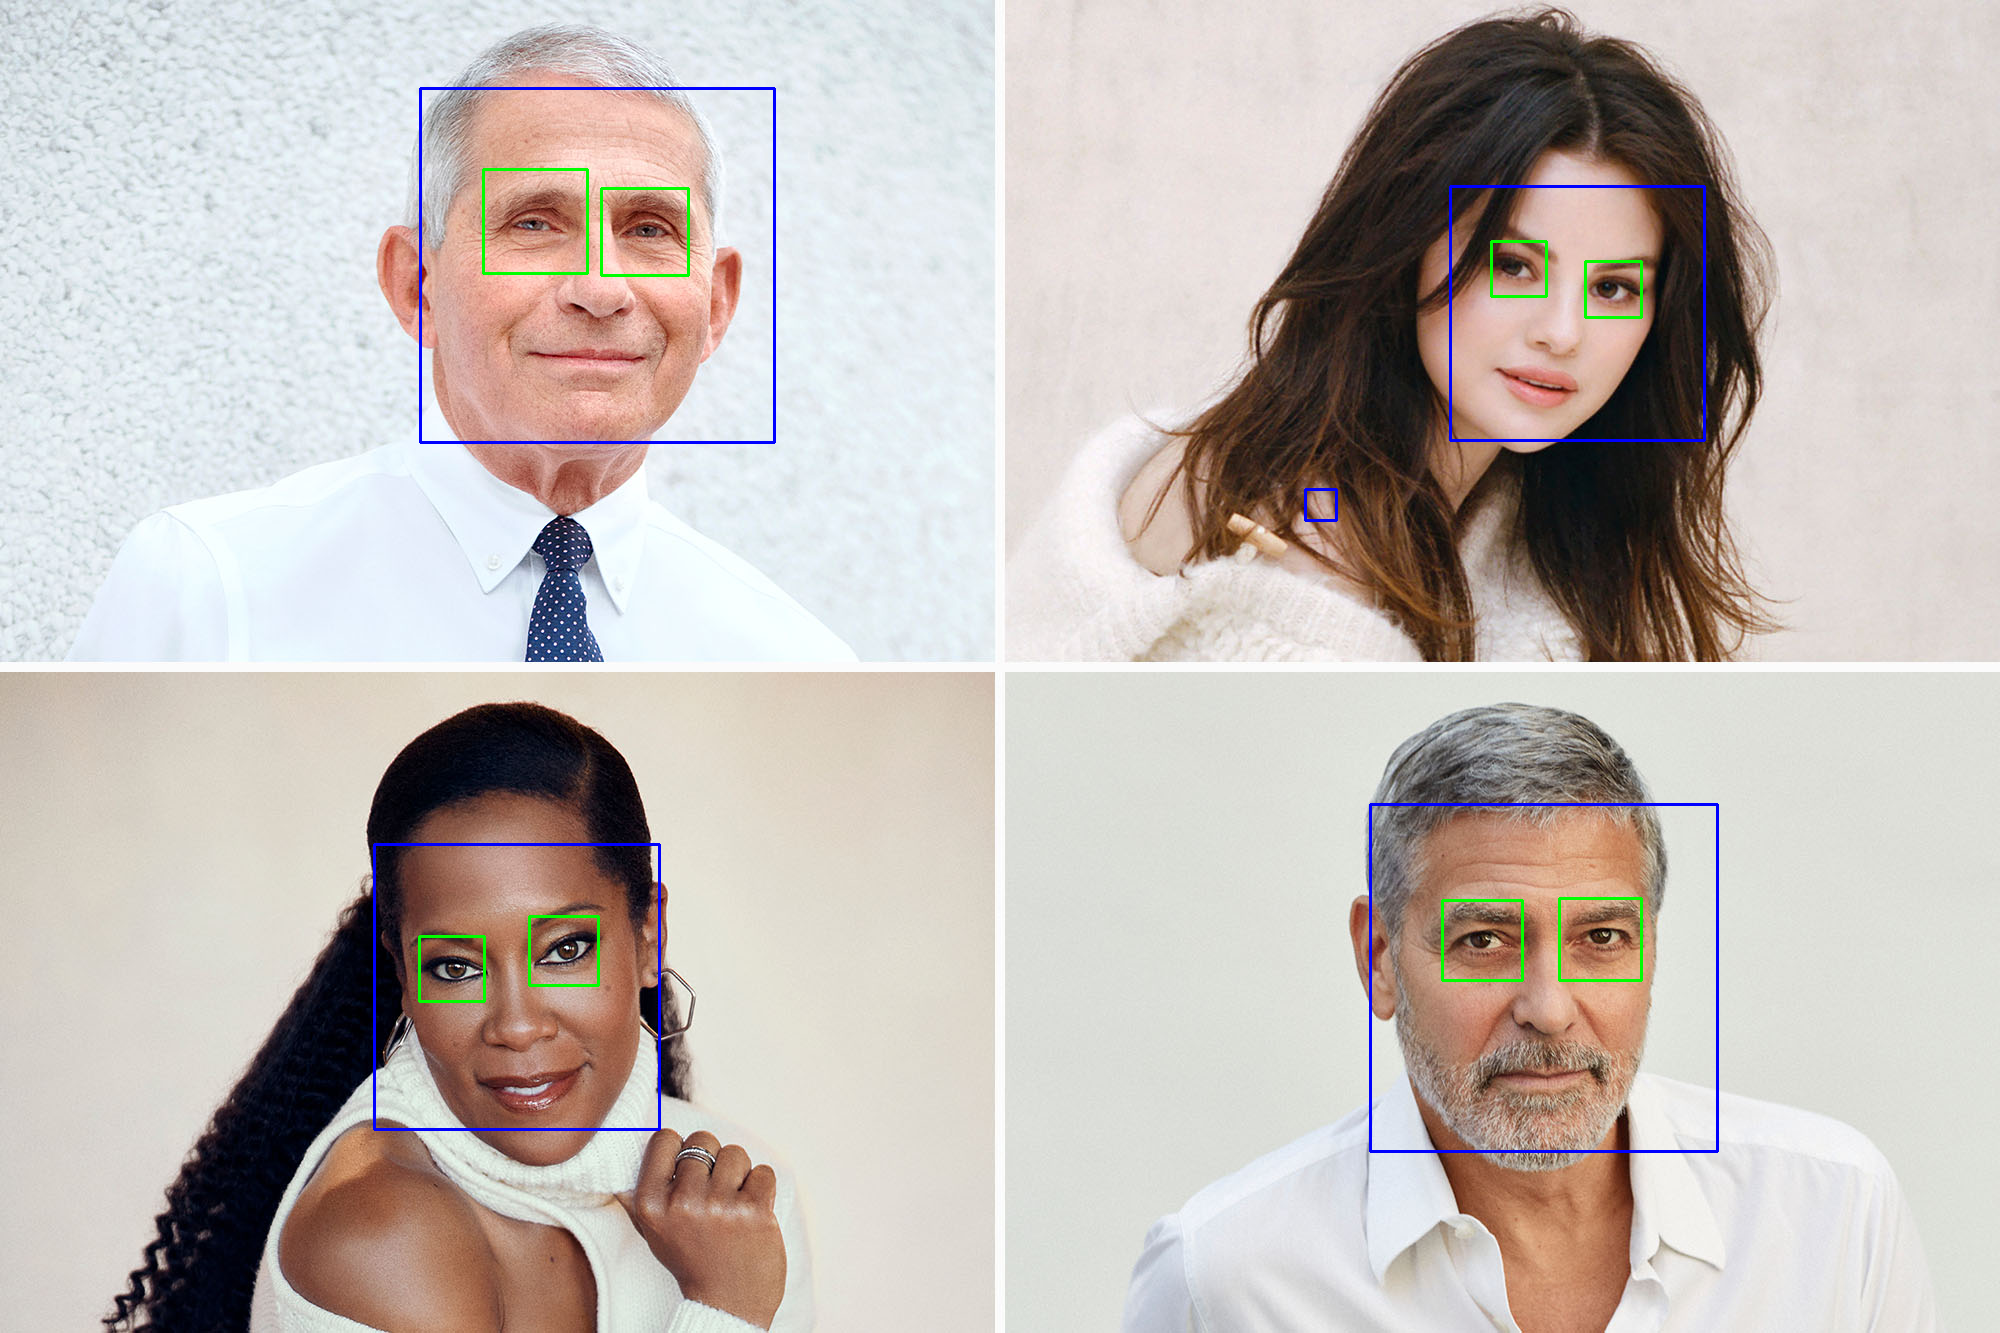

In [ ]:
from google.colab.patches import cv2_imshow
# Display the output
cv2_imshow(image)


Data Augmentation


In [ ]:
shape = [256, 256, 256]
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder( shape = shape, dtype = tf.float32)
flip_2 = tf.image.flip_up_down(x)
flip_3 = tf.image.flip_left_right(x)
flip_4 = tf.image.random_flip_up_down(x)
flip_5 = tf.image.random_flip_left_right(x)